# Spherical null geodesics in Kerr spacetime
## Computation with `kerrgeodesic_gw`

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://relativite.obspm.fr/blackholes/).

It requires [SageMath](http://www.sagemath.org/) (version $\geq$ 8.2), with the package [kerrgeodesic_gw](https://github.com/BlackHolePerturbationToolkit/kerrgeodesic_gw) (version $\geq$ 0.3.2). To install the latter, simply run 
```
sage -pip install kerrgeodesic_gw
```
in a terminal.

In [1]:
version()

'SageMath version 9.2, Release Date: 2020-10-24'

First, we set up the notebook to use LaTeX-formatted display:

In [2]:
%display latex

and we ask for CPU demanding computations to be performed in parallel on 8 processes:

In [3]:
Parallelism().set(nproc=8)

A Kerr black bole is entirely defined by two parameters $(m, a)$, where $m$ is the black hole mass and $a$ is the black hole angular momentum divided by $m$.
In this notebook, we shall set $m=1$ and we denote the angular momentum parameter $a$ by the symbolic variable `a`, using `a0` for a specific numerical value:

In [4]:
a = var('a')
a0 = 0.95

The spacetime object is created as an instance of the class `KerrBH`:

In [5]:
from kerrgeodesic_gw import KerrBH
M = KerrBH(a)
print(M)

Kerr spacetime M


The Boyer-Lindquist coordinate $r$ of the event horizon:

In [6]:
rH = M.event_horizon_radius()
rH

sqrt(-a^2 + 1) + 1

In [7]:
rH0 = rH.subs({a: a0})
show(LatexExpr(r'r_+ = '), rH0)

r_+ =  1.31224989991992

In [8]:
show(LatexExpr(r'r_- = '),
     M.inner_horizon_radius().subs({a: a0}))

r_- =  0.687750100080080

The method `boyer_lindquist_coordinates()` returns the chart of Boyer-Lindquist coordinates `BL` and allows the user to instanciate the Python variables `(t, r, th, ph)` to the coordinates $(t,r,\theta,\phi)$:

In [9]:
BL.<t, r, th, ph> = M.boyer_lindquist_coordinates()
BL

Chart (M, (t, r, th, ph))

The metric tensor is naturally returned by the method `metric()`:

In [10]:
g = M.metric()
g.display()

g = -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2) dt*dt - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r) dr*dr + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt + (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph*dph

## Spherical photon orbits

Functions $\ell(r_0)$ and $q(r_0)$ for spherical photon orbits:

In [11]:
r = var('r')
lsph(a, r) = (r^2*(3 - r) - a^2*(r + 1))/(a*(r -1))
lsph

(a, r) |--> -(a^2*(r + 1) + (r - 3)*r^2)/(a*(r - 1))

In [12]:
qsph(a, r) = r^3 / (a^2*(r - 1)^2) * (4*a^2 - r*(r - 3)^2)
qsph

(a, r) |--> -((r - 3)^2*r - 4*a^2)*r^3/(a^2*(r - 1)^2)

$\theta$-turning points:

In [13]:
theta0(a, l, q) = arccos(sqrt(1/2*(1 - (l^2+q)/a^2 + sqrt((1 - (l^2+q)/a^2)^2 + 4*q/a^2))))
theta0

(a, l, q) |--> arccos(sqrt(1/2*sqrt(((l^2 + q)/a^2 - 1)^2 + 4*q/a^2) - 1/2*(l^2 + q)/a^2 + 1/2))

In [14]:
theta1(a, l, q) = arccos(sqrt(1/2*(1 - (l^2+q)/a^2 - sqrt((1 - (l^2+q)/a^2)^2 + 4*q/a^2))))
theta1

(a, l, q) |--> arccos(sqrt(-1/2*sqrt(((l^2 + q)/a^2 - 1)^2 + 4*q/a^2) - 1/2*(l^2 + q)/a^2 + 1/2))

### Spherical photon orbit at $r_0 = 3 m$ ($q = q_{\rm max} = 27 m^2$)

In [15]:
r0 = 3.
E = 1
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(-1.90000000000000, 27.0000000000000)

In [16]:
theta0(a0, L, Q)

0.345877348029357

In [17]:
P = M.point((0, r0, pi/2, 0), name='P')
print(P)

Point P on the Kerr spacetime M


A geodesic is constructed by providing the range $[\lambda_{\rm min},\lambda_{\rm max}]$ of the affine parameter $\lambda$, the initial point and either 
 - (i) the Boyer-Lindquist components $(p^t_0, p^r_0, p^\theta_0, p^\phi_0)$ of the initial 4-momentum vector
   $p_0 = \left. \frac{\mathrm{d}x}{\mathrm{d}\lambda}\right| _{\lambda_{\rm min}}$,
 - (ii) the four integral of motions $(\mu, E, L, Q)$
 - or (iii) some of the components of $p_0$ along with with some integrals of motion. 

In [18]:
lmax = 100 # lambda_max

In [19]:
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.00000000000000 d/dt + (9.36596633575423e-9) d/dr + 0.577350269189626 d/dth

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [20]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.00000000000000 d/dt + 0.577350269189626 d/dth

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


The numerical integration of the geodesic equation is performed via `integrate()`, by providing the integration step $\delta\lambda$:

In [21]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,-
,,,,
,,,,
,,,,


In [22]:
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))

Final point: 


(t, r, th, ph) '=' (291.1717434701057, 3.0, 2.144493861874287, -39.55667803565552)

In [23]:
lplot = 0.32*lmax
print("max lambda (plot): ", lplot)
Li.plot(prange=(0, lplot), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.15, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey') \
     + line([(0,0,-3), (0,0,3)], color='black', thickness=2)

max lambda (plot):  32.0000000000000


Graphics3d Object

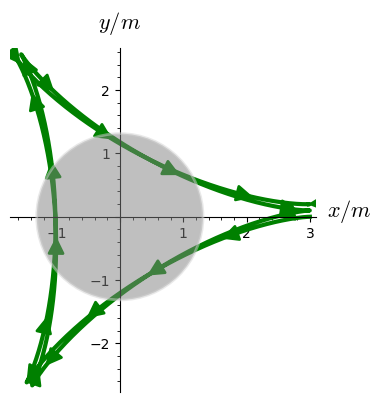

In [24]:
graph = Li.plot(coordinates='xy', prange=(0, lplot), plot_points=2000, 
                thickness=3, color='green', display_tangent=True, scale=0.15, 
                width_tangent=2, color_tangent='green', plot_points_tangent=20, 
                horizon_color='lightgrey', axes_labels=[r'$x/m$', r'$y/m$'])
graph.save("gik_spher_3d_r_30_xy.pdf")
graph

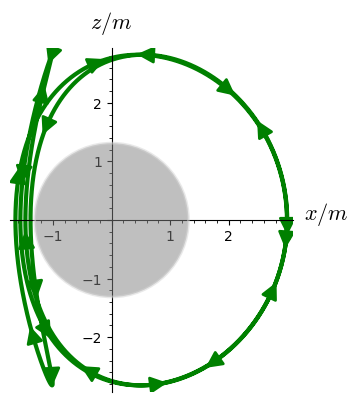

In [25]:
Li.plot(coordinates='xz', prange=(0, lplot), plot_points=2000, 
        thickness=3, color='green', display_tangent=True, scale=0.15, 
        width_tangent=2, color_tangent='green', plot_points_tangent=20, 
        horizon_color='lightgrey', axes_labels=[r'$x/m$', r'$z/m$'])

### Prograde spherical photon orbit at $r_0 = 1.6m$

In [26]:
r0 = 1.6
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(2.17105263157895, 5.97569713758080)

In [27]:
theta0(a0, L, Q)

0.705442812649839

In [28]:
P = M.point((0, r0, pi/2, 0), name='P')
lmax = 70
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.66666666666666 d/dt + (1.74608999691187e-24 + 2.85158136717879e-8*I) d/dr + 0.954892151626195 d/dth + 2.45614035087719 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [29]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.66666666666666 d/dt + 0.954892151626195 d/dth + 2.45614035087719 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [30]:
Li.integrate(step=0.0004, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [31]:
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))

Final point: 


(t, r, th, ph) '=' (492.9599102672748, 1.599974600261711, 0.8276182451833887, 185.0198306183178)

In [32]:
lplot = 0.11*lmax
print("max lambda (plot): ", lplot)
Li.plot(prange=(0, lplot), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.03, width_tangent=1, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey') \
    + line([(0,0,-1.5), (0,0,1.5)], color='black', thickness=2)

max lambda (plot):  7.70000000000000


Graphics3d Object

In [33]:
Li.plot(prange=(0, lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.03, width_tangent=1, color_tangent='green', 
        plot_points_tangent=40, horizon_color='lightgrey') \
    + line([(0,0,-1.5), (0,0,1.5)], color='black', thickness=2)

Graphics3d Object

### Spherical photon orbit at $r_0=2.8m$

In [34]:
r0 = 2.8
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(-1.08859649122807, 26.2604206422489)

In [35]:
theta0(a0, L, Q)

0.206050206829550

In [36]:
P = M.point((0, r0, pi/2, 0), name='P')
lmax = 100
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.22222222222222 d/dt + (4.65527024480212e-25 + 7.60263326216718e-9*I) d/dr + 0.653634213345212 d/dth + 0.116959064327486 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [37]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.22222222222222 d/dt + 0.653634213345212 d/dth + 0.116959064327486 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [38]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [39]:
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))

Final point: 


(t, r, th, ph) '=' (310.4228769082733, 2.8, 2.462502125969338, -39.07005458983995)

In [40]:
lplot = 0.38*lmax
print("max lambda (plot): ", lplot)
Li.plot(prange=(0, lplot), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.12, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

max lambda (plot):  38.0000000000000


Graphics3d Object

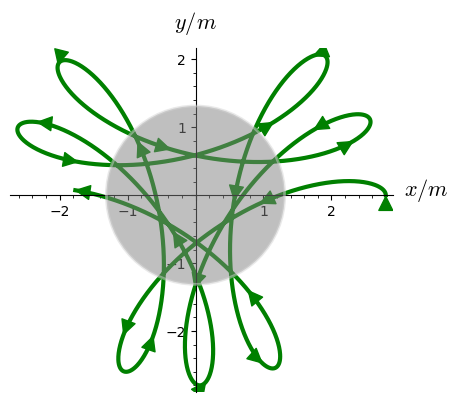

In [41]:
graph = Li.plot(coordinates='xy', prange=(0, lplot), plot_points=2000, 
                thickness=3, color='green', display_tangent=True, scale=0.01, 
                width_tangent=1, color_tangent='green', 
                plot_points_tangent=20, horizon_color='lightgrey',
                axes_labels=[r'$x/m$', r'$y/m$'])
graph.save("gik_spher_3d_r_28_xy.pdf")
graph

In [42]:
Li.plot(coordinates='txy', prange=(0, lplot), plot_points=2000, 
        thickness=3, color='green', display_tangent=True, scale=0.2, 
        width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

Graphics3d Object

### Retrograde spherical photon orbit at $r_0 = 3.9 m$

In [43]:
r0 = 3.9
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(-6.57395644283122, 3.52474056409564)

In [44]:
theta0(a0, L, Q)

1.29003447185548

In [45]:
P = M.point((0, r0, pi/2, 0), name='P')

In [46]:
lmax = 100
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 2.37931034482759 d/dt + (2.22112222707613e-8) d/dr + 0.123433875307859 d/dth - 0.326678765880218 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [47]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 2.37931034482759 d/dt + 0.123433875307859 d/dth - 0.326678765880218 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [48]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [49]:
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))

Final point: 


(t, r, th, ph) '=' (237.38270015383975, 3.9, 1.6881755637536546, -34.301693666892874)

In [50]:
lplot = 0.55*lmax
print("max lambda (plot): ", lplot)
Li.plot(prange=(0, lplot), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.15, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

max lambda (plot):  55.0000000000000


Graphics3d Object

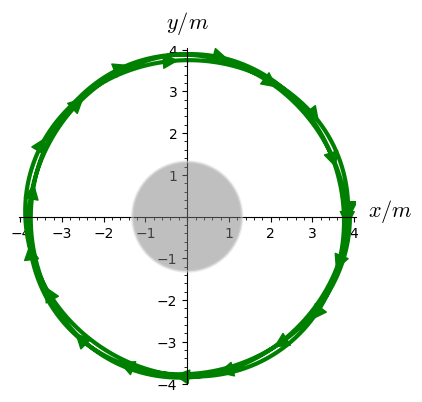

In [51]:
graph = Li.plot(coordinates='xy', prange=(0, lplot), plot_points=500, 
                thickness=3, color='green', display_tangent=True, scale=0.01, 
                width_tangent=1, color_tangent='green', 
                plot_points_tangent=20, horizon_color='lightgrey',
                axes_labels=[r'$x/m$', r'$y/m$'])
graph.save("gik_spher_3d_r_39_xy.pdf")
graph

### A polar spherical photon orbit

In [52]:
rph_pol(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)))
rph_pol

a |--> 2*sqrt(-1/3*a^2 + 1)*cos(1/3*arccos(-(a^2 - 1)/(-1/3*a^2 + 1)^(3/2))) + 1

In [53]:
r0 = rph_pol(a0)
L = lsph(a0, r0)
Q = qsph(a0, r0)
r0, L, Q

(2.49269429554008, -6.26333640524599e-16, 22.8640201857508)

In [54]:
theta0(a0, L, Q)

0.000000000000000

In [55]:
lmax = 30
P = M.point((0, r0, pi/2, 0), name='P')
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=0, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.67971815257238 d/dt + (1.31343299672075e-24 + 2.14499886438313e-8*I) d/dr + 0.769552507817167 d/dth + 0.357746396090726 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [56]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 3.67971815257238 d/dt + 0.769552507817167 d/dth + 0.357746396090726 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [57]:
Li.integrate(step=0.002, method='dopri5')
#Li.check_integrals_of_motion(0.99*lmax)

/home/eric/sage/9.2/local/lib/python3.8/site-packages/scipy/integrate/_ode.py:1179: UserWarning: dopri5: step size becomes too small
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


In [58]:
lplot = 0.5*lmax
print("max lambda (plot): ", lplot)
Li.plot(prange=(0, lplot), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.2, width_tangent=2, color_tangent='green', 
        plot_points_tangent=20, horizon_color='lightgrey')

max lambda (plot):  15.0000000000000


Graphics3d Object

## Inner spherical orbits

To plot the inner orbits, and in particular orbits with $r<0$, we use a map from Kerr spacetime to the Euclidean space based on the radial coordinate
$$
    \hat{r} := \frac{1}{2} \left( r + \sqrt{r^2 + 4m^2} \right) 
$$
instead of the Boyer-Lindquist $r$. 

In [59]:
E4 = M.map_to_Euclidean().codomain()
X4 = E4.cartesian_coordinates()
t, x, y, z = X4[:]
X4

Chart (E^4, (t, x, y, z))

In [60]:
rhat = 1/2*(r + sqrt(r^2 + 4))
rhat

1/2*r + 1/2*sqrt(r^2 + 4)

In [61]:
F = M.diff_map(E4, {(BL, X4): [t, rhat*sin(th)*cos(ph),
                               rhat*sin(th)*sin(ph),
                               rhat*cos(th)]}, name='F')
F.display()

F: M --> E^4
   (t, r, th, ph) |--> (t, x, y, z) = (t, 1/2*(r + sqrt(r^2 + 4))*cos(ph)*sin(th), 1/2*(r + sqrt(r^2 + 4))*sin(ph)*sin(th), 1/2*(r + sqrt(r^2 + 4))*cos(th))

### Marginally stable spherical photon orbit

In [62]:
r0 = 1 - (1 - a0^2)^(1/3)
r0

0.539741795874205

In [63]:
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(1.53893384905757, 0.282109845505914)

In [64]:
theta0(a0, L, Q)

1.17336440458345

Since all orbits with $0< r_0 \leq  r_{\rm ph}^*$ (such as the marginally stable spherical orbit) have $E<0$, we set `E = -1` and `L = -L`:

In [65]:
lmax = 50
P = M.point((0, r0, pi/2, 0), name='P')
Li = M.geodesic([0, lmax], P, mu=0, E=-1, L=-L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.69077392677338 d/dt + (3.13205131833926e-24 + 5.11502797462896e-8*I) d/dr + 1.82321137638829 d/dth + 5.62672311935440 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [66]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.69077392677338 d/dt + 1.82321137638829 d/dth + 5.62672311935440 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [67]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [68]:
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))

Final point: 


(t, r, th, ph) '=' (302.91453819062644,
 0.5397417961010423,
 1.5090634888129522,
 210.47540919172215)

Plot with respect to $\hat{r}$ coordinate:

In [69]:
sing_ring = circle((0,0,0), 1, thickness=3, color='orangered')
r_minf = sphere((0,0,0), 0.03, color='black') \
         + text3d("r=\u2212\u221E", (0,0,0.07), fontfamily='serif', 
                  fontstyle='italic', fontsize=20)

In [70]:
lplot = 0.06*lmax
print("max lambda (plot): ", lplot)
graph = Li.plot_integrated(chart=X4, mapping=F,
                   ambient_coords=(x,y,z), prange=(0, lplot),
                   thickness=3, plot_points=2000, color='green',
                   display_tangent=True, scale=0.012, width_tangent=1, 
                   color_tangent='green', plot_points_tangent=20,
                   label_axes=False)
graph += sing_ring + r_minf \
         + line([(0,0,-0.53), (0,0,0.53)], color='black', thickness=2)
graph._extra_kwds['axes_labels'] = ['\u0302x', '\u0302y', '\u0302z']
graph

max lambda (plot):  3.00000000000000


Graphics3d Object

In [71]:
lplot = 0.4*lmax
print("max lambda (plot): ", lplot)
graph = Li.plot_integrated(chart=X4, mapping=F,
                   ambient_coords=(x,y,z), prange=(0, lplot),
                   thickness=3, plot_points=2000, color='green',
                   display_tangent=True, scale=0.012, width_tangent=1, 
                   color_tangent='green', plot_points_tangent=20,
                   label_axes=False)
graph += sing_ring + r_minf \
         + line([(0,0,-0.53), (0,0,0.53)], color='black', thickness=2)
graph._extra_kwds['axes_labels'] = ['\u0302x', '\u0302y', '\u0302z']
graph

max lambda (plot):  20.0000000000000


Graphics3d Object

### Stable inner spherical photon orbit at $r_0 = 0.5 m$

In [72]:
r0 = 0.5
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(1.53421052631579, 0.268698060941828)

In [73]:
theta0(a0, L, Q)

1.17991588772518

In [74]:
lmax = 30
P = M.point((0, r0, pi/2, 0), name='P')
Li = M.geodesic([0, lmax], P, mu=0, E=-1, L=-L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.00000000000000 d/dt + 2.07344374774655 d/dth + 5.26315789473685 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [75]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 7.00000000000000 d/dt + 2.07344374774655 d/dth + 5.26315789473685 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [76]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [77]:
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))

Final point: 


(t, r, th, ph) '=' (160.26568413055006, 0.499999999999837, 1.4610686498265664, 113.33060855013213)

Plot in (Cartesian) Boyer-Lindquist coordinates:

In [78]:
Li.plot(prange=(0, lmax), plot_points=2000, thickness=3, color='green',
        display_tangent=True, scale=0.01, width_tangent=1, color_tangent='green', 
        plot_points_tangent=20, plot_horizon=False)

Graphics3d Object

Plot with respect to $\hat{r}$ coordinate:

In [79]:
lplot = 0.25*lmax
print("max lambda (plot): ", lplot)
graph1 = Li.plot_integrated(chart=X4, mapping=F,
                   ambient_coords=(x,y,z), prange=(0, lplot),
                   thickness=3, plot_points=2000, color='green',
                   display_tangent=True, scale=0.015, width_tangent=1, 
                   color_tangent='green', plot_points_tangent=20,
                   label_axes=False)
graph1 += sing_ring + r_minf
graph1._extra_kwds['axes_labels'] = ['\u0302x', '\u0302y', '\u0302z']
graph1

max lambda (plot):  7.50000000000000


Graphics3d Object

### Vortical circular photon orbit at $r_0 = r_{\rm ph}^{**}$

In [80]:
rph_ss = n(1/2 + cos(2/3*asin(a0) + 2*pi/3))
rph_ss

-0.477673658836338

In [81]:
L = lsph(a0, rph_ss)
Q = qsph(a0, rph_ss)
L, Q 

(-0.229456449433387, -0.519183008263141)

In [82]:
th0 = theta0(a0, L, Q)
th1 = theta1(a0, L, Q)
th0, th1

(0.513765577758655, 0.513765602376411)

In [83]:
th_ss = arcsin(sqrt(abs(L)/a0))
th_ss

0.513765590067533

In [84]:
rh_ss = rhat.subs({r: rph_ss})
rh_ss

0.789289150745023

In [85]:
lmax = 10
P = M.point((0, rph_ss, th_ss, 0), name='P')
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 0.323260590036169 d/dt + (1.63266670244580e-8) d/dr + (1.99960017051231e-8) d/dth - 1.40881021577044 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [86]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=0, pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 0.323260590036169 d/dt - 1.40881021577044 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [87]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [88]:
show("Final point: ", BL[:], "=", BL(Li(0.999*lmax)))

'Final point: ' (t, r, th, ph) '=' (3.229373294461296,
 -0.47767365883633794,
 0.513765590067533,
 -14.074014055546579)

In [89]:
lplot = 0.444*lmax
print("max lambda (plot): ", lplot)
vort_circ = Li.plot_integrated(chart=X4, mapping=F,
                   ambient_coords=(x,y,z), prange=(0, lplot),
                   thickness=3, plot_points=2000, color='lightgreen',
                   display_tangent=True, scale=0.1, width_tangent=1, 
                   color_tangent='lightgreen', plot_points_tangent=5,
                   label_axes=False)
graph = vort_circ + sing_ring + r_minf \
        + line([(0,0,0), (0,0,1.3*rh_ss)], color='black', thickness=2)
graph._extra_kwds['axes_labels'] = ['\u0302x', '\u0302y', '\u0302z']
graph

max lambda (plot):  4.44000000000000


Graphics3d Object

### Vortical inner spherical photon orbit at $r_0 = -0.46 m$

In [90]:
r0 = -0.46
L = lsph(a0, r0)
Q = qsph(a0, r0)
L, Q

(-0.176485940879596, -0.461285155596124)

In [91]:
th0 = theta0(a0, L, Q)
th1 = theta1(a0, L, Q)
th0, th1

(0.281889824619659, 0.731306339672501)

In [92]:
lmax = 20
P = M.point((0, r0, (th0+th1)/2, 0), name='P')
Li = M.geodesic([0, lmax], P, mu=0, E=E, L=L, Q=Q, a_num=a0,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 0.357024161116205 d/dt + (1.84776601065215e-8) d/dr + 0.396167049160545 d/dth - 1.22114489356954 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [93]:
v0 = Li.initial_tangent_vector()
Li = M.geodesic([0, lmax], P, pt0=v0[0], pr0=0, pth0=v0[2], pph0=v0[3],
                a_num=a0, name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 0.357024161116205 d/dt + 0.396167049160545 d/dth - 1.22114489356954 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [94]:
Li.integrate(step=0.001, method='dopri5')
Li.check_integrals_of_motion(0.999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


In [95]:
print("Final point: ")
show(BL[:], "=", BL(Li(0.999*lmax)))

Final point: 


(t, r, th, ph) '=' (6.6100475583006695,
 -0.45999868463861343,
 0.39359482789056505,
 -28.895385729902912)

In [96]:
lplot = lmax
print("max lambda (plot): ", lplot)
graph = Li.plot_integrated(chart=X4, mapping=F,
                   ambient_coords=(x,y,z), prange=(0, lplot),
                   thickness=3, plot_points=2000, color='green',
                   display_tangent=True, scale=0.1, width_tangent=1, 
                   color_tangent='green', plot_points_tangent=20,
                   label_axes=False)

max lambda (plot):  20


In [97]:
graph += sing_ring + r_minf + vort_circ \
         + line([(0,0,0), (0,0,0.9)], color='black', thickness=2)
graph._extra_kwds['axes_labels'] = ['\u0302x', '\u0302y', '\u0302z']
graph

Graphics3d Object

In [98]:
graph + graph1

Graphics3d Object